In [1]:
# To fix, need to change age range from jr, open etc. to 19-23. The full dataset is janky with weights, so not everyone is under junior, but it is under 19-23.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PEEPOOO


In [3]:
df = pd.read_csv('./openpl mid 2023/openpldata_all.csv')

C:\Users\Eric\AppData\Local\Temp\ipykernel_8380\1454962144.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./openpl mid 2023/openpldata_all.csv')


In [4]:
df.columns.tolist()

['Name',
 'Sex',
 'Event',
 'Equipment',
 'Age',
 'AgeClass',
 'BirthYearClass',
 'Division',
 'BodyweightKg',
 'WeightClassKg',
 'Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Best3SquatKg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Best3BenchKg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg',
 'Best3DeadliftKg',
 'TotalKg',
 'Place',
 'Dots',
 'Wilks',
 'Glossbrenner',
 'Goodlift',
 'Tested',
 'Country',
 'State',
 'Federation',
 'ParentFederation',
 'Date',
 'MeetCountry',
 'MeetState',
 'MeetTown',
 'MeetName']

In [5]:

# Create a copy of the original DataFrame
df_raw = df.copy()

# Filter the rows to keep only those where the "Equipment" column is equal to "Raw"
df_raw = df_raw[
    (df_raw["Tested"] == "Yes") 
    &
   (df_raw["Equipment"] == "Raw")  


]

df_raw.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [6]:
def sort_lifter_category(user_sex, user_age, user_weight):
    # Define the age classes and their corresponding titles
    age_classes = {
        (40, 49): 'Masters 1',
        (24, 39): 'Open',
        (50, 59): 'Masters 2',
        (60, 69): 'Masters 3',
        (14, 18): 'Sub-Junior',
        (19, 23): 'Junior',
        (70, 999): 'Masters 4'  # Use a high value to represent the last age class
    }
    BirthYearClass = {
        (40, 49): '40-49',
        (24, 39): '24-39',
        (50, 59): '50-59',
        (60, 69): '60-69',
        (14, 18): '14-18',
        (19, 23): '19-23',
        (70, 999): '70-999'  
    }

    # Define weight classes for Women and Men
    weight_classes = {
        'F': {
            48.01: '47',
            52.01: '52',
            57.01: '57',
            63.01: '63',
            69.01: '69',
            76.01: '76',
            84.01: '84',
            999: '84+'  # Use a high value to represent the last weight class
        },
        'M': {
            59.01: '59',
            66.01: '66',
            75.01: '74',
            83.01: '83',
            93.01: '93',
            105.01: '105',
            120.01: '120',
            999.01: '120+'  # Use a high value to represent the last weight class
        }
    }

    # Determine the age class based on user_age
    age_class = None
    for age_range, class_name in age_classes.items():
        if age_range[0] <= user_age <= age_range[1]:
            age_class = class_name
            break

    # Determine the BirthYearClass based on user_age
    age_class = None
    for age_range, class_name in age_classes.items():
        if age_range[0] <= user_age <= age_range[1]:
            age_class = class_name
            break

    # Determine the BirthYearClass based on user_age
    birth_class = None
    for age_range, class_name in BirthYearClass.items():
        if age_range[0] <= user_age <= age_range[1]:
            birth_class = class_name
            break

    # Determine the weight class based on user_weight
    weight_class = None
    for weight, class_name in weight_classes[user_sex].items():
        if user_weight < weight:
            weight_class = class_name
            break

    return age_class, weight_class, birth_class

# Take user input
user_sex = input("Enter Sex (M or F): ").upper()
user_age = float(input("Enter Age: "))      # Change int() to float()
user_weight = float(input("Enter Weight: "))  # Change int() to float()

# Get sorted category based on user input
age_class, weight_class, birth_class = sort_lifter_category(user_sex, user_age, user_weight)

# Create a dictionary to store the information
user_info = {
    'Sex': user_sex,
    'Age': user_age,
    'Weight': user_weight,
    'Division': age_class,
    'Weight Class': weight_class,
    'Birth Year Class': birth_class
}

# Output the results
print("User Information:")
for key, value in user_info.items():
    print(f"{key}: {value}")


Enter Sex (M or F): m
Enter Age: 21
Enter Weight: 90
User Information:
Sex: M
Age: 21.0
Weight: 90.0
Division: Junior
Weight Class: 93
Birth Year Class: 19-23


In [7]:

# Sort the df by the user demographic
df_sorted = df_raw[(df_raw['WeightClassKg'] == user_info["Weight Class"]) & (df_raw['Sex'] == user_info["Sex"]) & (df_raw['BirthYearClass'] == user_info['Birth Year Class'])]


# Display the sorted DataFrame
df_sorted

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
5334,Cazaly Jeremiah,M,SBD,Raw,22.5,20-23,19-23,Juniors,92.60,93,...,Yes,Nauru,NaN,OceaniaPF,IPF,2012-12-07,Australia,NSW,Syndey,Oceania Powerlifting and Bench Press Champions...
5434,Jester Duburiya,M,B,Raw,20.5,20-23,19-23,Juniors,91.80,93,...,Yes,Nauru,NaN,OceaniaPF,IPF,2016-12-06,New Zealand,NaN,Christchurch,Asia & Oceania Classic Men's Benchpress Champi...
5435,Angin Gadabu,M,B,Raw,20.5,20-23,19-23,Juniors,89.15,93,...,Yes,Nauru,NaN,OceaniaPF,IPF,2016-12-06,New Zealand,NaN,Christchurch,Asia & Oceania Classic Men's Benchpress Champi...
5436,Rory Lynch,M,B,Raw,22.0,20-23,19-23,Juniors,89.95,93,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2016-12-06,New Zealand,NaN,Christchurch,Asia & Oceania Classic Men's Benchpress Champi...
5767,Rhys Evans,M,B,Raw,19.5,20-23,19-23,Juniors,87.15,93,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2014-12-08,Australia,VIC,Melbourne,Asia & Oceania Championships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950591,Lars Lukeš,M,SBD,Raw,22.5,20-23,19-23,Juniors,91.85,93,...,Yes,Czechia,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950592,Adrian Rivadera,M,SBD,Raw,19.0,18-19,19-23,Juniors,92.25,93,...,Yes,Argentina,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950593,Thomas Delamore,M,SBD,Raw,22.0,20-23,19-23,Juniors,91.70,93,...,Yes,New Zealand,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950594,Imad Hamich,M,SBD,Raw,19.5,20-23,19-23,Juniors,92.25,93,...,Yes,Belgium,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships


In [8]:
#getting lifts

user_squat = float(input("Enter Squat in KG: "))

Enter Squat in KG: 200


Enter Squat in KG: 200


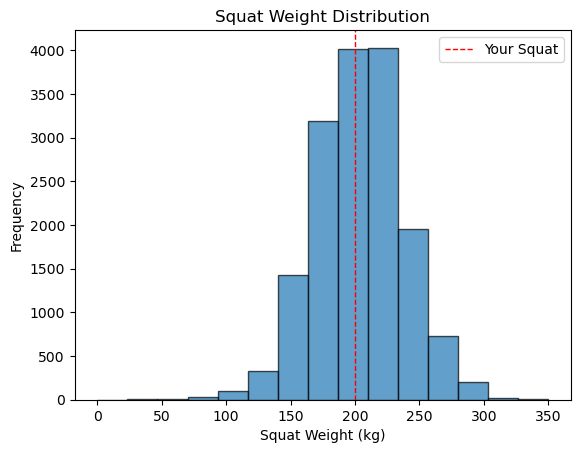

Your squat weight is greater than 49.39% of the recorded weights


In [9]:
#getting lifts

user_squat = float(input("Enter Squat in KG: "))


# Determine the range for the histogram
max_squat = df_sorted['Best3SquatKg'].max()
bin_range = (0, max_squat + 10)  # Adding 10 to the max value

# Create a histogram
plt.hist(df_sorted['Best3SquatKg'], bins=15, range=bin_range, edgecolor='black', alpha=0.7)
plt.axvline(user_squat, color='red', linestyle='dashed', linewidth=1, label='Your Squat')
plt.xlabel('Squat Weight (kg)')
plt.ylabel('Frequency')
plt.title('Squat Weight Distribution')
plt.legend()
plt.show()

# Filter rows by non-NaN values in 'Best3SquatKg' column
filtered_df = df_sorted[df_sorted['Best3SquatKg'].notna()]

# Calculate the percentage of recorded weights in the filtered DataFrame
squat_stronger_then = (filtered_df['Best3SquatKg'] <= user_squat).sum() / len(filtered_df['Best3SquatKg']) * 100

# Print the result
print("Your squat weight is greater than {:.2f}% of the recorded weights".format(squat_stronger_then))

You are better than 57.23% of the recorded lifters in column 'TotalKg'.


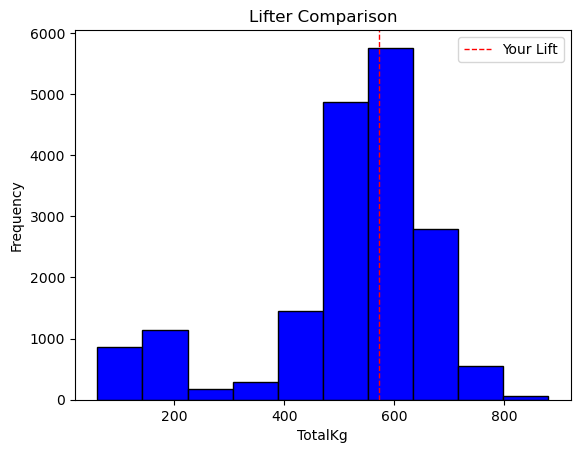

In [10]:
def analyze_lifters(dataframe, column_name, user_lift):
    # Filter rows by non-NaN values in the specified column
    filtered_df = dataframe[dataframe[column_name].notna()]

    # Calculate the percentage of lifters the user is better than
    better_than_percentage = (filtered_df[column_name] <= user_lift).sum() / len(filtered_df[column_name]) * 100

    # Print the result
    print("You are better than {:.2f}% of the recorded lifters in column '{}'.".format(better_than_percentage, column_name))

    # Create a histogram
    plt.hist(filtered_df[column_name], bins=10, color='blue', edgecolor='black')
    plt.axvline(user_lift, color='red', linestyle='dashed', linewidth=1, label='Your Lift')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Lifter Comparison')
    plt.legend()
    plt.show()
analyze_lifters(df_sorted,'TotalKg',572)